In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data = pd.read_csv('weatherAUS.csv')

In [6]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [7]:
data.dropna(subset = ['RainTomorrow'] ,inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

<Axes: title={'center': 'number of data per year'}, xlabel='Date', ylabel='count'>

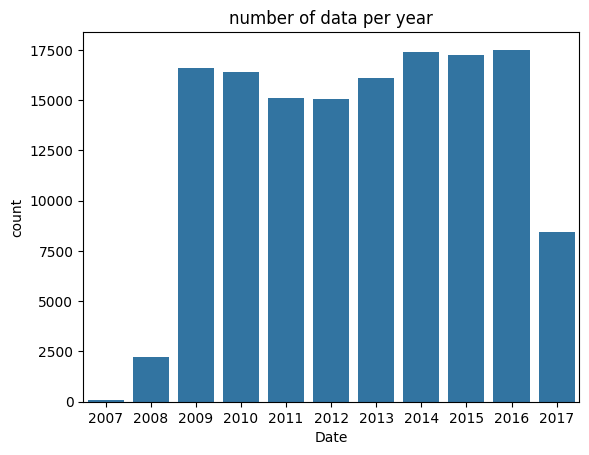

In [9]:
plt.title("number of data per year")
sns.countplot(x = pd.to_datetime(data.Date).dt.year)

In [10]:
x = pd.to_datetime(data.Date).dt.year

In [11]:
train_data = data[x <2015]
val_data = data[x == 2015]
test_data = data[x > 2015]


In [12]:
len(train_data)

98988

In [13]:
column_input = data.columns[1:-1]
column_target = 'RainTomorrow'
train_input = train_data[column_input].copy()
train_output = train_data[column_target]

val_input = val_data[column_input].copy()
val_output = val_data[column_target]

test_input = test_data[column_input].copy()
test_output = test_data[column_target]

In [14]:
train_input

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,...,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No
144549,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,...,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No
144550,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,...,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No
144551,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,...,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No


In [15]:
numeric_col = data.select_dtypes(include=np.number).columns.tolist()
cat_col = data.select_dtypes(include= 'object').columns.tolist()

In [16]:
cat_col.remove('RainTomorrow')

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(skip_complete=True)

In [18]:
imputer = imputer.fit(data[numeric_col])

C:\Users\DC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [19]:
train_input[numeric_col] = imputer.transform(train_input[numeric_col])
test_input[numeric_col] = imputer.transform(test_input[numeric_col])
val_input[numeric_col] = imputer.transform(val_input[numeric_col])

In [20]:
print(train_input[numeric_col].isna().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64


In [21]:
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder

In [22]:
scaler = MinMaxScaler().fit(data[numeric_col])

In [23]:
train_input[numeric_col] = scaler.transform(train_input[numeric_col])
test_input[numeric_col] = scaler.transform(test_input[numeric_col])
val_input[numeric_col] = scaler.transform(val_input[numeric_col])

In [24]:
val_input[numeric_col]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
2133,0.469340,0.724008,0.0,0.059423,0.898480,0.186047,0.053846,0.126437,0.45,0.14,0.545455,0.5424,0.105792,0.177039,0.594937,0.731286
2134,0.566038,0.839319,0.0,0.073467,0.881385,0.387597,0.069231,0.103448,0.45,0.12,0.586777,0.5648,0.097422,0.233118,0.691983,0.836852
2135,0.603774,0.814745,0.0,0.069600,0.918962,0.325581,0.153846,0.229885,0.35,0.19,0.618182,0.5632,0.035593,0.189385,0.767932,0.813820
2136,0.813679,0.716446,0.0,0.074069,0.432503,0.271318,0.053846,0.080460,0.46,0.37,0.547107,0.5600,0.888889,0.555556,0.729958,0.696737
2137,0.648585,0.756144,0.0,0.061520,0.487745,0.209302,0.053846,0.103448,0.60,0.34,0.609917,0.6016,0.888889,0.631927,0.691983,0.727447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,0.683962,0.746692,0.0,0.086477,0.788966,0.356589,0.269231,0.229885,0.23,0.12,0.540496,0.5280,0.253340,0.278878,0.664557,0.737044
144914,0.625000,0.778828,0.0,0.084346,0.964384,0.372093,0.230769,0.356322,0.17,0.07,0.565289,0.5408,0.066608,0.139280,0.715190,0.775432
144915,0.613208,0.792060,0.0,0.085020,0.922334,0.387597,0.253846,0.252874,0.12,0.07,0.530579,0.4864,0.017109,0.204811,0.744726,0.769674
144916,0.672170,0.826087,0.0,0.085261,0.936046,0.410853,0.153846,0.195402,0.12,0.12,0.441322,0.4080,0.007556,0.111111,0.812236,0.840691


In [25]:
cat_col.remove('Date')

In [26]:
train_input[cat_col].isna().sum()

Location          0
WindGustDir    6943
WindDir9am     7323
WindDir3pm     2030
RainToday      1000
dtype: int64

In [27]:
train_input[cat_col] = train_input[cat_col].fillna('Unknown')
test_input[cat_col] = test_input[cat_col].fillna('Unknown')
val_input[cat_col] = val_input[cat_col].fillna('Unknown')

In [28]:
train_input[cat_col].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [29]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(data[cat_col])

C:\Users\DC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
encoder_cat_col = list(encoder.get_feature_names_out(cat_col))

In [31]:
len(encoder_cat_col)

103

In [32]:
train_input[encoder_cat_col] = encoder.transform(train_input[cat_col])
test_input[encoder_cat_col] = encoder.transform(test_input[cat_col])


C:\Users\DC\AppData\Local\Temp\ipykernel_10644\2105281140.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_input[encoder_cat_col] = encoder.transform(train_input[cat_col])
C:\Users\DC\AppData\Local\Temp\ipykernel_10644\2105281140.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_input[encoder_cat_col] = encoder.transform(train_input[cat_col])
C:\Users\DC\AppData\Local\Temp\ipykernel_10644\2105281140.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

In [33]:
val_input[encoder_cat_col] = encoder.transform(val_input[cat_col])

C:\Users\DC\AppData\Local\Temp\ipykernel_10644\1142006350.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_input[encoder_cat_col] = encoder.transform(val_input[cat_col])
C:\Users\DC\AppData\Local\Temp\ipykernel_10644\1142006350.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_input[encoder_cat_col] = encoder.transform(val_input[cat_col])
C:\Users\DC\AppData\Local\Temp\ipykernel_10644\1142006350.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

In [34]:
test_input

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,Albury,0.681604,0.801512,0.000000,0.074086,0.600345,ENE,0.372093,Unknown,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.066050,0.371274,SSE,0.341085,SSE,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.045662,0.322809,ENE,0.325581,ESE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,Albury,0.608491,0.538752,0.042049,0.038498,0.217052,SSE,0.255814,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2502,Albury,0.566038,0.523629,0.018329,0.024857,0.204244,ENE,0.193798,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,0.283019,0.502836,0.000000,0.033413,0.683891,E,0.193798,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145455,Uluru,0.266509,0.533081,0.000000,0.036837,0.723197,E,0.193798,SE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145456,Uluru,0.285377,0.568998,0.000000,0.037205,0.775079,NNW,0.124031,SE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145457,Uluru,0.327830,0.599244,0.000000,0.043234,0.719519,N,0.240310,SE,WNW,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [35]:
x_train = train_input[numeric_col + encoder_cat_col]
x_test = test_input[numeric_col + encoder_cat_col]
x_val = val_input[numeric_col + encoder_cat_col]

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model = DecisionTreeClassifier(random_state=42)

In [38]:
model.fit(x_train , train_output)

DecisionTreeClassifier(random_state=42)

In [39]:
train_predict = model.predict(x_train)

In [40]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [41]:
confusion_matr = confusion_matrix(train_predict , train_output)

In [42]:
print(confusion_matr)


[[76705     2]
 [    0 22281]]


In [43]:
val_predict = model.predict(x_val)

In [44]:
confusion_mat = confusion_matrix(val_predict , val_output)

In [45]:
print(confusion_mat)

[[11792  1755]
 [ 1791  1893]]


In [46]:
score = accuracy_score(val_predict , val_output)

In [47]:
print(score)

0.794208113284197


In [48]:
model.feature_importances_

array([2.86920413e-02, 2.68475290e-02, 3.72881650e-02, 3.42442458e-02,
       8.50563812e-02, 5.35204019e-02, 2.33373779e-02, 2.21247786e-02,
       3.28889599e-02, 2.54319478e-01, 3.56319562e-02, 7.13713418e-02,
       2.28555577e-02, 2.94229864e-02, 3.32198196e-02, 2.90455775e-02,
       1.84461994e-03, 2.33756227e-03, 1.76599080e-03, 6.07074164e-04,
       1.64391314e-03, 9.99174374e-04, 1.41359976e-03, 1.34493703e-03,
       1.46620629e-03, 1.54084818e-03, 9.19932907e-04, 2.66406481e-03,
       1.45925600e-03, 3.27990091e-04, 1.66212294e-03, 1.60096845e-03,
       1.28893428e-04, 1.35516887e-03, 1.80335469e-03, 1.49953800e-03,
       9.67872637e-04, 1.16886605e-03, 2.29052575e-03, 5.44854466e-04,
       8.46652919e-04, 6.72118690e-04, 1.87074362e-03, 1.44656269e-03,
       1.36343292e-03, 9.72761529e-04, 5.36569606e-04, 1.67715253e-03,
       1.64781854e-03, 1.64901573e-03, 7.77667944e-04, 1.75988386e-03,
       1.55478901e-03, 2.35004238e-03, 1.74445346e-03, 3.39192611e-04,
      

In [49]:
dic = pd.DataFrame({'features' : x_train.columns , 'importance' : model.feature_importances_ }).sort_values('importance', ascending=False)
dic.head(10)

,features,importance
9,Humidity3pm,0.254319
4,Sunshine,0.085056
11,Pressure3pm,0.071371
5,WindGustSpeed,0.053520
2,Rainfall,0.037288
10,Pressure9am,0.035632
3,Evaporation,0.034244
14,Temp9am,0.033220
8,Humidity9am,0.032889
13,Cloud3pm,0.029423


<Axes: xlabel='importance', ylabel='features'>

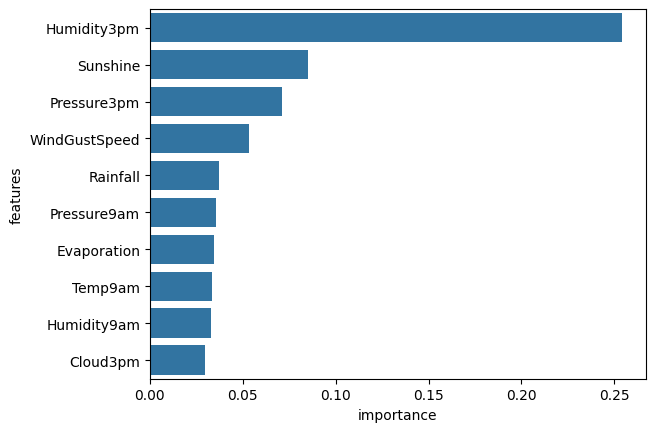

In [50]:
sns.barplot(data = dic.head(10) , x='importance' , y = 'features')

In [51]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth o

In [52]:
model = DecisionTreeClassifier(max_depth=7 , random_state=42)
model.fit(x_train , train_output)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [53]:
model.score(x_train , train_output)

0.8476684042510203

In [54]:
model.score(x_test , test_output)

0.831985831985832

In [55]:
model.score(x_val , val_output)

0.844582438628054

In [56]:
for i in range(1,15):
    model = DecisionTreeClassifier(max_depth=i , random_state=42)
    model.fit(x_train , train_output)
    print(i , " " ,model.score(x_test , test_output))
    
    

1   0.8086933086933087
2   0.8166243166243167
3   0.8244013244013244
4   0.827057827057827
5   0.8307538307538308
6   0.8328328328328328
7   0.831985831985832
8   0.8337568337568337
9   0.8305998305998306
10   0.8291368291368292
11   0.8308308308308309
12   0.8268653268653269
13   0.8237083237083237
14   0.8176638176638177


In [57]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(x_train, train_output)
    train_acc = 1 - model.score(x_train, train_output)
    val_acc = 1 - model.score(x_val, val_output)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [58]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

KeyboardInterrupt: 

In [59]:
print(errors_df)

NameError: name 'errors_df' is not defined

In [ ]:
best_model  = DecisionTreeClassifier(max_depth=7 , random_state=42)
model.fit(x_train , train_output)
print(model.score(x_val , val_output))

In [ ]:
model.get_depth()

In [76]:
u = 1;
count = 2
while(True):
    count = 2**u;
    u  = u + 1
    print("for the max_leaf_node = " , u)
    for i in range(1,9):        
        best_model  = DecisionTreeClassifier(max_depth = i , max_leaf_nodes=u, random_state=42)
        best_model.fit(x_train , train_output)
        print('max_leaf_node' , count , ' ','max_depth ',i ,' ' , best_model.score(x_val , val_output))
    if(u > 12) :
        break;
        
    

for the max_leaf_node =  2
max_leaf_node 2   max_depth  1   0.8224711276188266
max_leaf_node 2   max_depth  2   0.8224711276188266
max_leaf_node 2   max_depth  3   0.8224711276188266
max_leaf_node 2   max_depth  4   0.8224711276188266
max_leaf_node 2   max_depth  5   0.8224711276188266


KeyboardInterrupt: 

In [ ]:
import joblib
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'numeric_cols': numeric_col,
    'categorical_cols': cat_col,
    'encoded_cols': encoder_cat_col
}

joblib.dump(aussie_rain, 'aussie_rain.joblib')

In [60]:
pd.DataFrame(x_train).to_parquet('train_input.parquet')
pd.DataFrame(train_output).to_parquet('train_output.parquet')
pd.DataFrame(x_test).to_parquet('test_input.parquet')
pd.DataFrame(test_output).to_parquet('test_output.parquet')
pd.DataFrame(x_val).to_parquet('val_input.parquet')
pd.DataFrame(val_output).to_parquet('val_output.parquet')

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
random_model = RandomForestClassifier(random_state=42 , n_jobs= -1)

In [64]:
random_model.fit(x_train,train_output)

RandomForestClassifier(n_jobs=1, random_state=42)

In [70]:
print(random_model.score(x_val,val_output))

0.8567697754047937


In [71]:
print(random_model.score(x_test,test_output))

0.8446138446138446


In [87]:
def randomforest(count):
    temp_model = RandomForestClassifier(random_state=42 , n_jobs= -1 , n_estimators=count)    
    temp_model.fit(x_train,train_output)
    score = temp_model.score(x_val,val_output)    
    print("n_estimators : " , count , "accuracy : " , score)
    return score

In [94]:
previous = 0.5  # Initialize error with a low value
count = 0
while True:
    count += 10
    score = randomforest(count)
    if previous > score:
        break
    previous = score


n_estimators :  10 accuracy :  0.8449886831872787
n_estimators :  20 accuracy :  0.8498636178979746
n_estimators :  30 accuracy :  0.853809993616157
n_estimators :  40 accuracy :  0.8552028321049272
n_estimators :  50 accuracy :  0.8543323080494458


In [102]:
randomforest(100)

n_estimators :  100 accuracy :  0.8567697754047937


0.8567697754047937

In [104]:
def test_param(**param):
    model =  RandomForestClassifier(random_state=42 , n_jobs= -1 , **param).fit(x_train,train_output)
    score_train = model.score(x_val,val_output)
    score_val = model.score(x_val,val_output)
    print("training score : " , score_train , " val score : " , score_val )

In [140]:
test_param(n_estimators=120 , max_depth = 70 , max_features = 10  , min_samples_split = 90)

training score :  0.8530555394347397  val score :  0.8530555394347397


In [143]:
radom_model =  RandomForestClassifier(random_state=42 , n_jobs= -1 , n_estimators=120 , max_depth = 70 , max_features = 10  , min_samples_split = 90).fit(x_train,train_output)

In [145]:
import joblib
joblib.dump(radom_model , "radom_model.joblib")

['radom_model.joblib']

In [5]:
new_model= RandomForestClassifier(random_state=42 , n_jobs= -1 , min_impurity_decrease=1e-7 , max_samples=0.9 , class_weight={'No': 1, 'Yes': 2})

NameError: name 'RandomForestClassifier' is not defined